## Baltimore 2016

In [1]:
#Dependencies
import pandas as pd
import numpy as np
import os
import time
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import itertools
%matplotlib inline

#Load files
baltimore = "Resources/baltimore_data_df3.csv"
full_moon = "Resources/full_moon.csv"


#Read file and store into pandas data frame
baltimore_df = pd.read_csv(baltimore, sep = ',')
full_moon_data_df = pd.read_csv(full_moon, sep = ',')


In [2]:
#Shorten  data frames to get just desired columns

#Baltimore
baltimore_crime_2016 = baltimore_df[['CrimeDate', 'Description', 'Weapon']].copy()
baltimore_crime_2016['CrimeDate'] = pd.to_datetime(baltimore_crime_2016['CrimeDate']).dt.normalize()
baltimore_crime_2016.rename(columns = {'CrimeDate':'Crime Date', 'Description':'Offense Description'}, inplace = True)
# baltimore_data_df3['Description'].value_counts()


#Full Moon
#fix columns by renaming (removing space before name)
full_moon_data_df.columns = ['Day', 'Calendar Date', 'Time']

#set column date as date_time and sort to get desired year
full_moon_data_df['Calendar Date']= pd.to_datetime(full_moon_data_df['Calendar Date'])
full_moon_2016 = full_moon_data_df[full_moon_data_df['Calendar Date'].dt.year == 2016]

In [3]:
#Baltimore Crime January Data
baltimore_crime_jan_unsorted = baltimore_crime_2016[baltimore_crime_2016['Crime Date'].dt.month == 1]
baltimore_crime_jan = baltimore_crime_jan_unsorted.sort_values(by="Crime Date")

#To find value for day with full moon
baltimore_crime_jan_24 = baltimore_crime_jan[baltimore_crime_jan['Crime Date'].dt.day == 24]

day_average = f'{((baltimore_crime_jan_24["Crime Date"].count()/baltimore_crime_jan["Crime Date"].count())*100).round(2)}%'
monthly_average = f'{int(baltimore_crime_jan["Crime Date"].count()/31)}'

df_total_jan = pd.DataFrame(baltimore_crime_jan['Crime Date'].value_counts())
df_total_jan.columns = ['Reported Crime']
df_total_jan['Rank'] = df_total_jan['Reported Crime'].rank(ascending=0)
baltimore_jan_max = df_total_jan['Reported Crime'].max()
baltimore_jan_min = df_total_jan['Reported Crime'].min()


print(f'January in Baltimore:')
print(f'Total number of crimes reported: {baltimore_crime_jan["Crime Date"].count()}')
print(f'Average number of crimes per day for whole month: {monthly_average}')
print(f'The maximum crime committed on one day: {baltimore_jan_max}')
print(f'The minimum crime committed on one day: {baltimore_jan_min}')
print(f'Total crime on full mon (January 24th): {baltimore_crime_jan_24["Crime Date"].count()}')
print(f'Percentage of monthly crime that occured on day of the full moon: {day_average}')
print(f'Rank of crime on full moon: 30/31')
#df_total_jan['Reported Crime'].max()

January in Baltimore:
Total number of crimes reported: 3407
Average number of crimes per day for whole month: 109
The maximum crime committed on one day: 161
The minimum crime committed on one day: 33
Total crime on full mon (January 24th): 46
Percentage of monthly crime that occured on day of the full moon: 1.35%
Rank of crime on full moon: 30/31


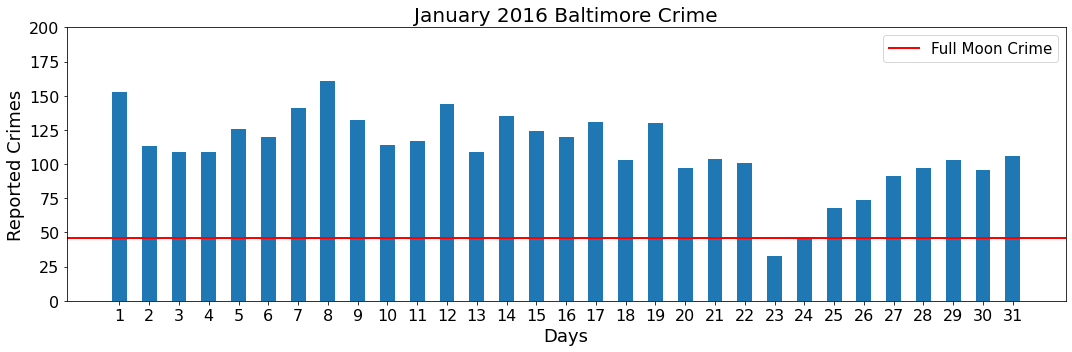

In [4]:
#Baltimore Crime January Plot
#Sort index by date and prepare for x-axis to be labeled by days alone
value_count = baltimore_crime_jan['Crime Date'].value_counts().sort_index()
days_month= list(range(1,32))
x=list(range(1,32))

#Plot parameters
fig = plt.figure(figsize = (15,5))
plt.bar(days_month, value_count, width = .5)

#label plot
plt.xticks(x)
plt.tick_params(labelsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylim(0,200)
plt.ylabel('Reported Crimes', fontsize=18)
plt.title('January 2016 Baltimore Crime', fontsize=20)

#add line for day of full moon
plt.axhline(y=46, color='r', linewidth=2)

#labels = ["Full Moon Crime line"]
#handles, _ = ax.get_legend_handles_labels()

plt.legend(["Full Moon Crime"],prop={'size': 15})
fig.tight_layout()

plt.savefig('baltimore_images/baltimore_2016_jan.png')
plt.show()

In [5]:
#Baltimore Crime February Data
baltimore_crime_feb_unsorted = baltimore_crime_2016[baltimore_crime_2016['Crime Date'].dt.month == 2]
baltimore_crime_feb = baltimore_crime_feb_unsorted.sort_values(by="Crime Date")

#To find value for day with full moon
baltimore_crime_feb_22 = baltimore_crime_feb[baltimore_crime_feb['Crime Date'].dt.day == 22]

day_average = f'{((baltimore_crime_feb_22["Crime Date"].count()/baltimore_crime_feb["Crime Date"].count())*100).round(2)}%'
monthly_average = f'{int(baltimore_crime_feb["Crime Date"].count()/31)}'

df_total_feb = pd.DataFrame(baltimore_crime_feb['Crime Date'].value_counts())
df_total_feb.columns = ['Reported Crime']
df_total_feb['Rank'] = df_total_feb['Reported Crime'].rank(ascending=0)
baltimore_feb_max = df_total_feb['Reported Crime'].max()
baltimore_feb_min = df_total_feb['Reported Crime'].min()


print(f'February in Baltimore:')
print(f'Total number of crimes reported: {baltimore_crime_feb["Crime Date"].count()}')
print(f'Average number of crimes per day for whole month: {monthly_average}')
print(f'The maximum crime committed on one day: {baltimore_feb_max}')
print(f'The minimum crime committed on one day: {baltimore_feb_min}')
print(f'Total crime on full mon (Febuary 24th): {baltimore_crime_feb_22["Crime Date"].count()}')
print(f'Percentage of monthly crime that occured on day of the full moon: {day_average}')
print(f'Rank of crime on full moon: 5/29')
#df_total_feb['Reported Crime'].max()

February in Baltimore:
Total number of crimes reported: 2888
Average number of crimes per day for whole month: 93
The maximum crime committed on one day: 124
The minimum crime committed on one day: 63
Total crime on full mon (Febuary 24th): 115
Percentage of monthly crime that occured on day of the full moon: 3.98%
Rank of crime on full moon: 5/29


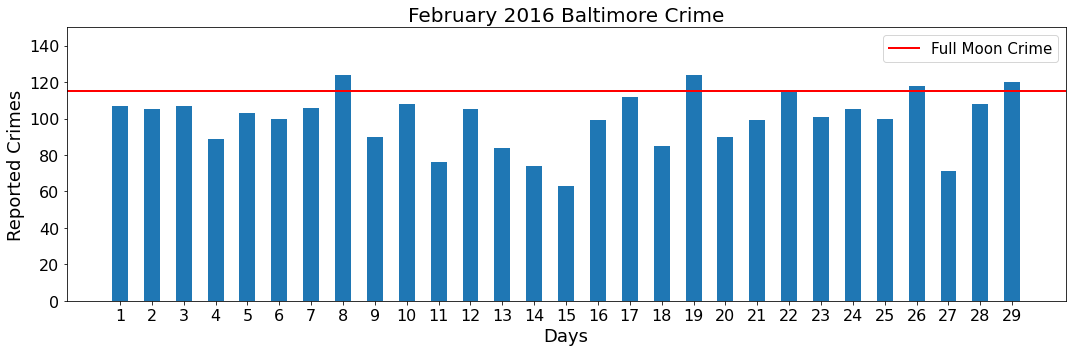

In [6]:
#Baltimore Crime February Plot
#Sort index by date and prepare for x-axis to be labeled by days alone
value_count = baltimore_crime_feb['Crime Date'].value_counts().sort_index()
days_month= list(range(1,30))
x=list(range(1,30))

#Plot parameters
fig = plt.figure(figsize = (15,5))
plt.bar(days_month, value_count, width = .5)

#label plot
plt.xticks(x)
plt.tick_params(labelsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylim(0,150)
plt.ylabel('Reported Crimes', fontsize=18)
plt.title('February 2016 Baltimore Crime', fontsize=20)

#add line for day of full moon
plt.axhline(y=115, color='r', linewidth=2)

#labels = ["Full Moon Crime line"]
#handles, _ = ax.get_legend_handles_labels()

plt.legend(["Full Moon Crime"],prop={'size': 15})
fig.tight_layout()

plt.savefig('baltimore_images/baltimore_2016_feb.png')
plt.show()

In [7]:
#Baltimore Crime March Data
baltimore_crime_mar_unsorted = baltimore_crime_2016[baltimore_crime_2016['Crime Date'].dt.month == 3]
baltimore_crime_mar = baltimore_crime_mar_unsorted.sort_values(by="Crime Date")

#To find value for day with full moon
baltimore_crime_mar_23 = baltimore_crime_mar[baltimore_crime_mar['Crime Date'].dt.day == 23]

day_average = f'{((baltimore_crime_mar_23["Crime Date"].count()/baltimore_crime_mar["Crime Date"].count())*100).round(2)}%'
monthly_average = f'{int(baltimore_crime_mar["Crime Date"].count()/31)}'

df_total_mar = pd.DataFrame(baltimore_crime_mar['Crime Date'].value_counts())
df_total_mar.columns = ['Reported Crime']
df_total_mar['Rank'] = df_total_mar['Reported Crime'].rank(ascending=0)
baltimore_mar_max = df_total_mar['Reported Crime'].max()
baltimore_mar_min = df_total_mar['Reported Crime'].min()


print(f'March in Baltimore:')
print(f'Total number of crimes reported: {baltimore_crime_mar["Crime Date"].count()}')
print(f'Average number of crimes per day for whole month: {monthly_average}')
print(f'The maximum crime committed on one day: {baltimore_mar_max}')
print(f'The minimum crime committed on one day: {baltimore_mar_min}')
print(f'Total crime on full mon (March 24th): {baltimore_crime_mar_23["Crime Date"].count()}')
print(f'Percentage of monthly crime that occured on day of the full moon: {day_average}')
print(f'Rank of crime on full moon: 3/31')
#df_total_mar['Reported Crime'].max()

March in Baltimore:
Total number of crimes reported: 3635
Average number of crimes per day for whole month: 117
The maximum crime committed on one day: 149
The minimum crime committed on one day: 86
Total crime on full mon (March 24th): 139
Percentage of monthly crime that occured on day of the full moon: 3.82%
Rank of crime on full moon: 3/31


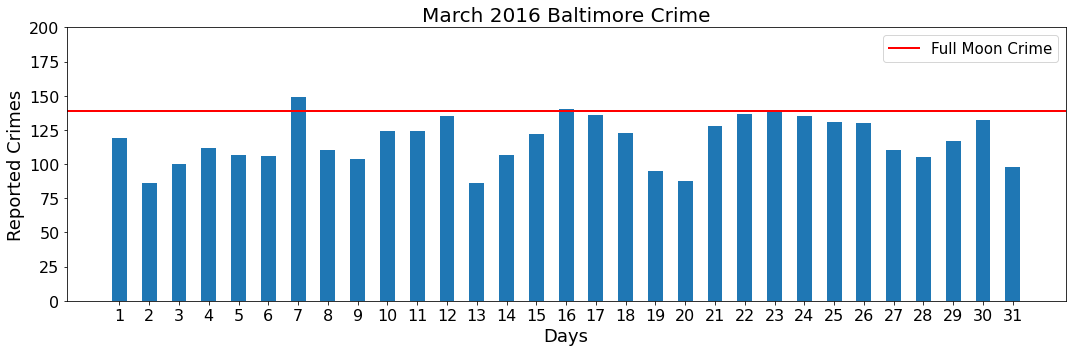

In [8]:
#Baltimore Crime March Plot
#Sort index by date and prepare for x-axis to be labeled by days alone
value_count = baltimore_crime_mar['Crime Date'].value_counts().sort_index()
days_month= list(range(1,32))
x=list(range(1,32))

#Plot parameters
fig = plt.figure(figsize = (15,5))
plt.bar(days_month, value_count, width = .5)

#label plot
plt.xticks(x)
plt.tick_params(labelsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylim(0,200)
plt.ylabel('Reported Crimes', fontsize=18)
plt.title('March 2016 Baltimore Crime', fontsize=20)

#add line for day of full moon
plt.axhline(y=139, color='r', linewidth=2)

#labels = ["Full Moon Crime line"]
#handles, _ = ax.get_legend_handles_labels()

plt.legend(["Full Moon Crime"],prop={'size': 15})
fig.tight_layout()

plt.savefig('baltimore_images/baltimore_2016_mar.png')
plt.show()

In [9]:
#Baltimore Crime April Data
baltimore_crime_apr_unsorted = baltimore_crime_2016[baltimore_crime_2016['Crime Date'].dt.month == 4]
baltimore_crime_apr = baltimore_crime_apr_unsorted.sort_values(by="Crime Date")

#To find value for day with full moon
baltimore_crime_apr_22 = baltimore_crime_apr[baltimore_crime_apr['Crime Date'].dt.day == 22]

day_average = f'{((baltimore_crime_apr_22["Crime Date"].count()/baltimore_crime_apr["Crime Date"].count())*100).round(2)}%'
monthly_average = f'{int(baltimore_crime_apr["Crime Date"].count()/31)}'

df_total_apr = pd.DataFrame(baltimore_crime_apr['Crime Date'].value_counts())
df_total_apr.columns = ['Reported Crime']
df_total_apr['Rank'] = df_total_apr['Reported Crime'].rank(ascending=0)
baltimore_apr_max = df_total_apr['Reported Crime'].max()
baltimore_apr_min = df_total_apr['Reported Crime'].min()


print(f'April in Baltimore:')
print(f'Total number of crimes reported: {baltimore_crime_apr["Crime Date"].count()}')
print(f'Average number of crimes per day for whole month: {monthly_average}')
print(f'The maximum crime committed on one day: {baltimore_apr_max}')
print(f'The minimum crime committed on one day: {baltimore_apr_min}')
print(f'Total crime on full mon (April 22nd): {baltimore_crime_apr_22["Crime Date"].count()}')
print(f'Percentage of monthly crime that occured on day of the full moon: {day_average}')
print(f'Rank of crime on full moon: 4/30')
#df_total_apr['Reported Crime'].max()

April in Baltimore:
Total number of crimes reported: 3859
Average number of crimes per day for whole month: 124
The maximum crime committed on one day: 157
The minimum crime committed on one day: 97
Total crime on full mon (April 22nd): 147
Percentage of monthly crime that occured on day of the full moon: 3.81%
Rank of crime on full moon: 4/30


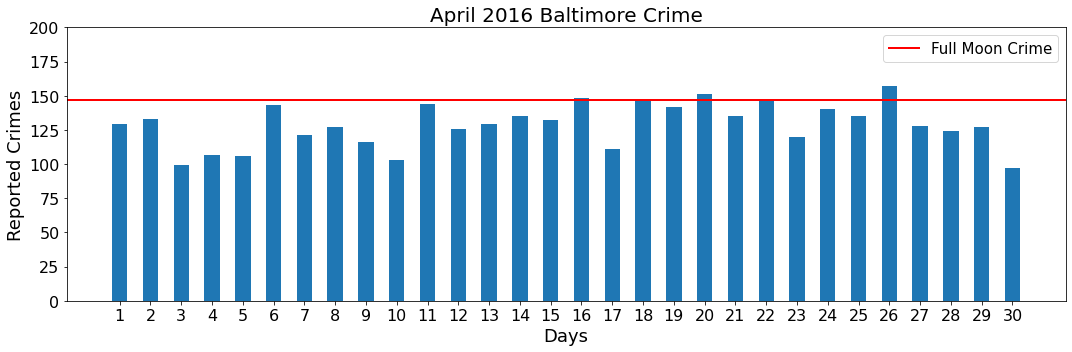

In [10]:
#Baltimore Crime April Plot
#Sort index by date and prepare for x-axis to be labeled by days alone
value_count = baltimore_crime_apr['Crime Date'].value_counts().sort_index()
days_month= list(range(1,31))
x=list(range(1,31))

#Plot parameters
fig = plt.figure(figsize = (15,5))
plt.bar(days_month, value_count, width = .5)

#label plot
plt.xticks(x)
plt.tick_params(labelsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylim(0,200)
plt.ylabel('Reported Crimes', fontsize=18)
plt.title('April 2016 Baltimore Crime', fontsize=20)

#add line for day of full moon
plt.axhline(y=147, color='r', linewidth=2)

#labels = ["Full Moon Crime line"]
#handles, _ = ax.get_legend_handles_labels()

plt.legend(["Full Moon Crime"],prop={'size': 15})
fig.tight_layout()

plt.savefig('baltimore_images/baltimore_2016_apr.png')
plt.show()

In [11]:
#Baltimore Crime May Data
baltimore_crime_may_unsorted = baltimore_crime_2016[baltimore_crime_2016['Crime Date'].dt.month == 5]
baltimore_crime_may = baltimore_crime_may_unsorted.sort_values(by="Crime Date")

#To find value for day with full moon
baltimore_crime_may_21 = baltimore_crime_may[baltimore_crime_may['Crime Date'].dt.day == 21]

day_average = f'{((baltimore_crime_may_21["Crime Date"].count()/baltimore_crime_may["Crime Date"].count())*100).round(2)}%'
monthly_average = f'{int(baltimore_crime_may["Crime Date"].count()/31)}'

df_total_may = pd.DataFrame(baltimore_crime_may['Crime Date'].value_counts())
df_total_may.columns = ['Reported Crime']
df_total_may['Rank'] = df_total_may['Reported Crime'].rank(ascending=0)
baltimore_may_max = df_total_may['Reported Crime'].max()
baltimore_may_min = df_total_may['Reported Crime'].min()


print(f'May in Baltimore:')
print(f'Total number of crimes reported: {baltimore_crime_may["Crime Date"].count()}')
print(f'Average number of crimes per day for whole month: {monthly_average}')
print(f'The maximum crime committed on one day: {baltimore_may_max}')
print(f'The minimum crime committed on one day: {baltimore_may_min}')
print(f'Total crime on full mon (May 21st): {baltimore_crime_may_21["Crime Date"].count()}')
print(f'Percentage of monthy crime that occured on day of the full moon: {day_average}')
print(f'Rank of crime on full moon: 28/31')
df_total_may['Reported Crime'].max()

May in Baltimore:
Total number of crimes reported: 4256
Average number of crimes per day for whole month: 137
The maximum crime committed on one day: 166
The minimum crime committed on one day: 104
Total crime on full mon (May 21st): 130
Percentage of monthy crime that occured on day of the full moon: 3.05%
Rank of crime on full moon: 28/31


166

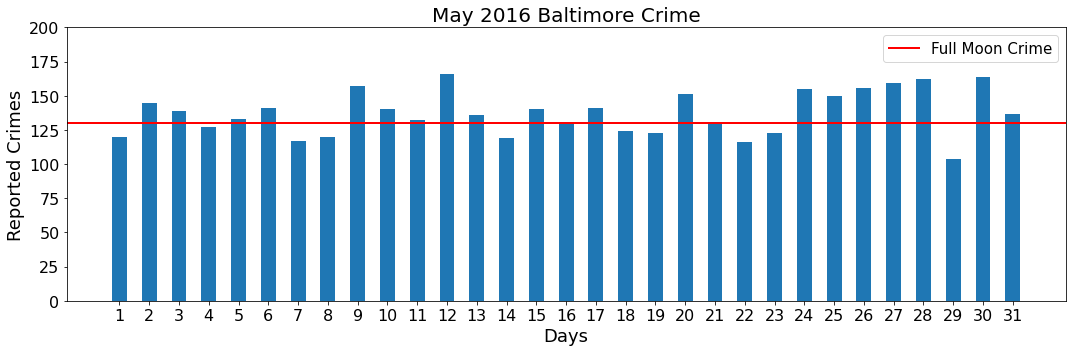

In [12]:
#Baltimore Crime May Plot
#Sort index by date and prepare for x-axis to be labeled by days alone
value_count = baltimore_crime_may['Crime Date'].value_counts().sort_index()
days_month= list(range(1,32))
x=list(range(1,32))

#Plot parameters
fig = plt.figure(figsize = (15,5))
plt.bar(days_month, value_count, width = .5)

#label plot
plt.xticks(x)
plt.tick_params(labelsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylim(0,200)
plt.ylabel('Reported Crimes', fontsize=18)
plt.title('May 2016 Baltimore Crime', fontsize=20)

#add line for day of full moon
plt.axhline(y=130, color='r', linewidth=2)

#labels = ["Full Moon Crime line"]
#handles, _ = ax.get_legend_handles_labels()

plt.legend(["Full Moon Crime"],prop={'size': 15})
fig.tight_layout()

plt.savefig('baltimore_images/baltimore_2016_may.png')
plt.show()

In [13]:
#Baltimore Crime June Data
baltimore_crime_june_unsorted = baltimore_crime_2016[baltimore_crime_2016['Crime Date'].dt.month == 6]
baltimore_crime_june = baltimore_crime_june_unsorted.sort_values(by="Crime Date")

#To find value for day with full moon
baltimore_crime_june_20 = baltimore_crime_june[baltimore_crime_june['Crime Date'].dt.day == 20]

day_average = f'{((baltimore_crime_june_20["Crime Date"].count()/baltimore_crime_june["Crime Date"].count())*100).round(2)}%'
monthly_average = f'{int(baltimore_crime_june["Crime Date"].count()/31)}'

df_total_june = pd.DataFrame(baltimore_crime_june['Crime Date'].value_counts())
df_total_june.columns = ['Reported Crime']
df_total_june['Rank'] = df_total_june['Reported Crime'].rank(ascending=0)
baltimore_june_max = df_total_june['Reported Crime'].max()
baltimore_june_min = df_total_june['Reported Crime'].min()


print(f'June in Baltimore:')
print(f'Total number of crimes reported: {baltimore_crime_june["Crime Date"].count()}')
print(f'Average number of crimes per day for whole month: {monthly_average}')
print(f'The maximum crime committed on one day: {baltimore_june_max}')
print(f'The minimum crime committed on one day: {baltimore_june_min}')
print(f'Total crime on full mon (June 20th): {baltimore_crime_june_20["Crime Date"].count()}')
print(f'Percentage of monthy crime that occured on day of the full moon: {day_average}')
print(f'Rank of crime on full moon: 2/30')
df_total_june['Reported Crime'].max()

June in Baltimore:
Total number of crimes reported: 4442
Average number of crimes per day for whole month: 143
The maximum crime committed on one day: 255
The minimum crime committed on one day: 113
Total crime on full mon (June 20th): 186
Percentage of monthy crime that occured on day of the full moon: 4.19%
Rank of crime on full moon: 2/30


255

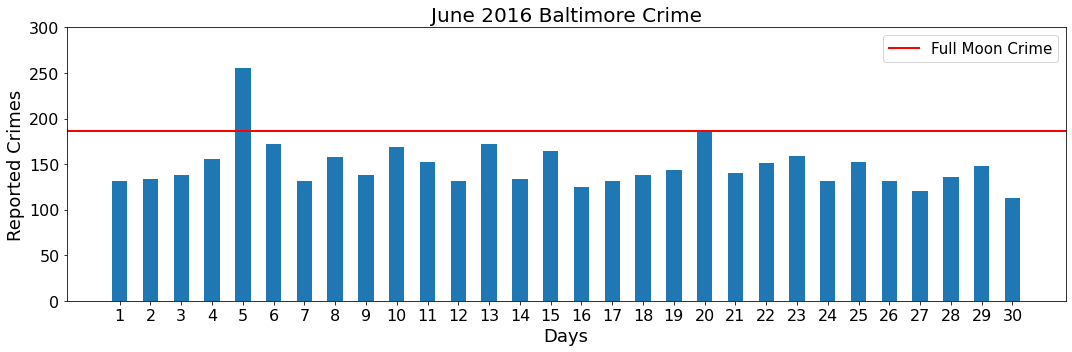

In [14]:
#Baltimore Crime June Plot
#Sort index by date and prepare for x-axis to be labeled by days alone
value_count = baltimore_crime_june['Crime Date'].value_counts().sort_index()
days_month= list(range(1,31))
x=list(range(1,31))

#Plot parameters
fig = plt.figure(figsize = (15,5))
plt.bar(days_month, value_count, width = .5)

#label plot
plt.xticks(x)
plt.tick_params(labelsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylim(0,300)
plt.ylabel('Reported Crimes', fontsize=18)
plt.title('June 2016 Baltimore Crime', fontsize=20)

#add line for day of full moon
plt.axhline(y=186, color='r', linewidth=2)

#labels = ["Full Moon Crime line"]
#handles, _ = ax.get_legend_handles_labels()

plt.legend(["Full Moon Crime"],prop={'size': 15})
fig.tight_layout()

plt.savefig('baltimore_images/baltimore_2016_june.png')
plt.show()

In [15]:
#Baltimore Crime July Data
baltimore_crime_july_unsorted = baltimore_crime_2016[baltimore_crime_2016['Crime Date'].dt.month == 7]
baltimore_crime_july = baltimore_crime_july_unsorted.sort_values(by="Crime Date")

#To find value for day with full moon
baltimore_crime_july_20 = baltimore_crime_july[baltimore_crime_july['Crime Date'].dt.day == 20]

day_average = f'{((baltimore_crime_july_20["Crime Date"].count()/baltimore_crime_july["Crime Date"].count())*100).round(2)}%'
monthly_average = f'{int(baltimore_crime_july["Crime Date"].count()/31)}'

df_total_july = pd.DataFrame(baltimore_crime_july['Crime Date'].value_counts())
df_total_july.columns = ['Reported Crime']
df_total_july['Rank'] = df_total_july['Reported Crime'].rank(ascending=0)
baltimore_july_max = df_total_july['Reported Crime'].max()
baltimore_july_min = df_total_july['Reported Crime'].min()


print(f'July in Baltimore:')
print(f'Total number of crimes reported: {baltimore_crime_july["Crime Date"].count()}')
print(f'Average number of crimes per day for whole month: {monthly_average}')
print(f'The maximum crime committed on one day: {baltimore_july_max}')
print(f'The minimum crime committed on one day: {baltimore_july_min}')
print(f'Total crime on full mon (July 20th): {baltimore_crime_july_20["Crime Date"].count()}')
print(f'Percentage of monthy crime that occured on day of the full moon: {day_average}')
print(f'Rank of crime on full moon: 1/31')
df_total_july['Reported Crime'].max()

July in Baltimore:
Total number of crimes reported: 4106
Average number of crimes per day for whole month: 132
The maximum crime committed on one day: 163
The minimum crime committed on one day: 107
Total crime on full mon (July 20th): 162
Percentage of monthy crime that occured on day of the full moon: 3.95%
Rank of crime on full moon: 1/31


163

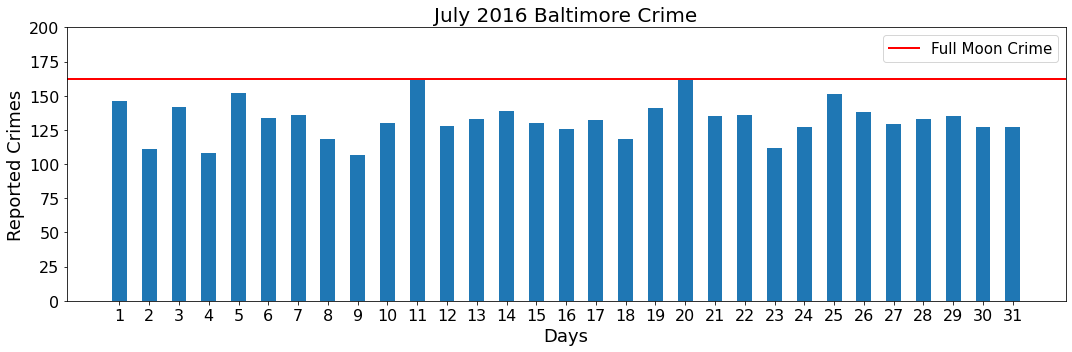

In [16]:
#Baltimore Crime July Plot
#Sort index by date and prepare for x-axis to be labeled by days alone
value_count = baltimore_crime_july['Crime Date'].value_counts().sort_index()
days_month= list(range(1,32))
x=list(range(1,32))

#Plot parameters
fig = plt.figure(figsize = (15,5))
plt.bar(days_month, value_count, width = .5)

#label plot
plt.xticks(x)
plt.tick_params(labelsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylim(0,200)
plt.ylabel('Reported Crimes', fontsize=18)
plt.title('July 2016 Baltimore Crime', fontsize=20)

#add line for day of full moon
plt.axhline(y=162, color='r', linewidth=2)

#labels = ["Full Moon Crime line"]
#handles, _ = ax.get_legend_handles_labels()

plt.legend(["Full Moon Crime"],prop={'size': 15})
fig.tight_layout()

plt.savefig('baltimore_images/baltimore_2016_july.png')
plt.show()

In [17]:
#Baltimore Crime August Data
baltimore_crime_aug_unsorted = baltimore_crime_2016[baltimore_crime_2016['Crime Date'].dt.month == 8]
baltimore_crime_aug = baltimore_crime_aug_unsorted.sort_values(by="Crime Date")

#To find value for day with full moon
baltimore_crime_aug_18 = baltimore_crime_aug[baltimore_crime_aug['Crime Date'].dt.day == 18]

day_average = f'{((baltimore_crime_aug_18["Crime Date"].count()/baltimore_crime_aug["Crime Date"].count())*100).round(2)}%'
monthly_average = f'{int(baltimore_crime_aug["Crime Date"].count()/31)}'

df_total_aug = pd.DataFrame(baltimore_crime_aug['Crime Date'].value_counts())
df_total_aug.columns = ['Reported Crime']
df_total_aug['Rank'] = df_total_aug['Reported Crime'].rank(ascending=0)
baltimore_aug_max = df_total_aug['Reported Crime'].max()
baltimore_aug_min = df_total_aug['Reported Crime'].min()


print(f'August in Baltimore:')
print(f'Total number of crimes reported: {baltimore_crime_aug["Crime Date"].count()}')
print(f'Average number of crimes per day for whole month: {monthly_average}')
print(f'The maximum crime committed on one day: {baltimore_aug_max}')
print(f'The minimum crime committed on one day: {baltimore_aug_min}')
print(f'Total crime on full mon (August 18th): {baltimore_crime_aug_18["Crime Date"].count()}')
print(f'Percentage of monthy crime that occured on day of the full moon: {day_average}')
print(f'Rank of crime on full moon: 28/31')
df_total_aug['Reported Crime'].max()

August in Baltimore:
Total number of crimes reported: 4263
Average number of crimes per day for whole month: 137
The maximum crime committed on one day: 159
The minimum crime committed on one day: 105
Total crime on full mon (August 18th): 143
Percentage of monthy crime that occured on day of the full moon: 3.35%
Rank of crime on full moon: 28/31


159

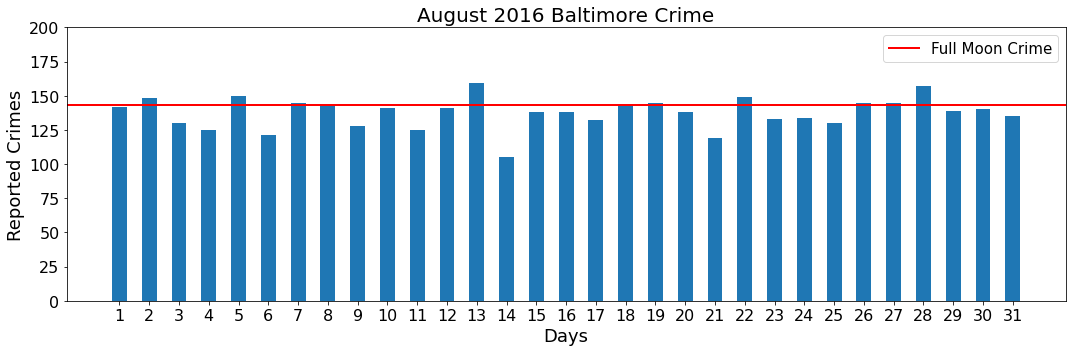

In [18]:
#Baltimore Crime August Plot
#Sort index by date and prepare for x-axis to be labeled by days alone
value_count = baltimore_crime_aug['Crime Date'].value_counts().sort_index()
days_month= list(range(1,32))
x=list(range(1,32))

#Plot parameters
fig = plt.figure(figsize = (15,5))
plt.bar(days_month, value_count, width = .5)

#label plot
plt.xticks(x)
plt.tick_params(labelsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylim(0,200)
plt.ylabel('Reported Crimes', fontsize=18)
plt.title('August 2016 Baltimore Crime', fontsize=20)

#add line for day of full moon
plt.axhline(y=143, color='r', linewidth=2)

#labels = ["Full Moon Crime line"]
#handles, _ = ax.get_legend_handles_labels()

plt.legend(["Full Moon Crime"],prop={'size': 15})
fig.tight_layout()

plt.savefig('baltimore_images/baltimore_2016_aug.png')
plt.show()

In [19]:
#Baltimore Crime September Data
baltimore_crime_sept_unsorted = baltimore_crime_2016[baltimore_crime_2016['Crime Date'].dt.month == 9]
baltimore_crime_sept = baltimore_crime_sept_unsorted.sort_values(by="Crime Date")

#To find value for day with full moon
baltimore_crime_sept_16 = baltimore_crime_sept[baltimore_crime_sept['Crime Date'].dt.day == 16]

day_average = f'{((baltimore_crime_sept_16["Crime Date"].count()/baltimore_crime_sept["Crime Date"].count())*100).round(2)}%'
monthly_average = f'{int(baltimore_crime_sept["Crime Date"].count()/31)}'

df_total_sept = pd.DataFrame(baltimore_crime_sept['Crime Date'].value_counts())
df_total_sept.columns = ['Reported Crime']
df_total_sept['Rank'] = df_total_sept['Reported Crime'].rank(ascending=0)
baltimore_sept_max = df_total_sept['Reported Crime'].max()
baltimore_sept_min = df_total_sept['Reported Crime'].min()


print(f'September in Baltimore:')
print(f'Total number of crimes reported: {baltimore_crime_sept["Crime Date"].count()}')
print(f'Average number of crimes per day for whole month: {monthly_average}')
print(f'The maximum crime committed on one day: {baltimore_sept_max}')
print(f'The minimum crime committed on one day: {baltimore_sept_min}')
print(f'Total crime on full mon (September 16th): {baltimore_crime_sept_16["Crime Date"].count()}')
print(f'Percentage of monthy crime that occured on day of the full moon: {day_average}')
print(f'Rank of crime on full moon: 28/30')
df_total_sept['Reported Crime'].max()

September in Baltimore:
Total number of crimes reported: 4509
Average number of crimes per day for whole month: 145
The maximum crime committed on one day: 194
The minimum crime committed on one day: 127
Total crime on full mon (September 16th): 151
Percentage of monthy crime that occured on day of the full moon: 3.35%
Rank of crime on full moon: 28/30


194

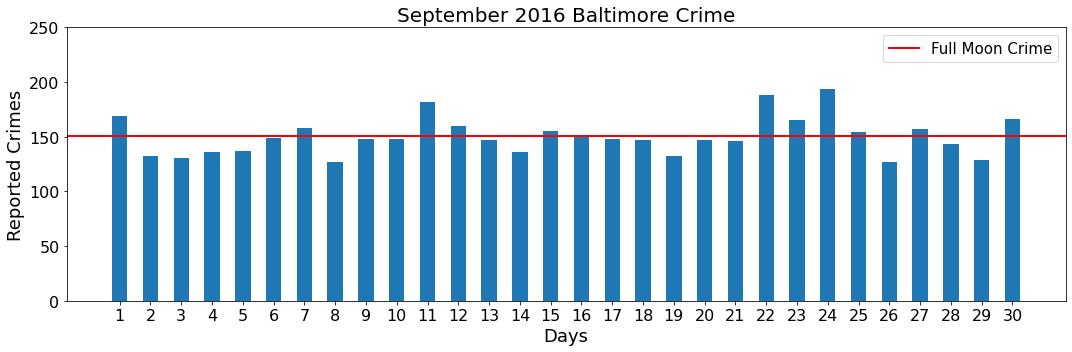

In [20]:
#Baltimore Crime September Plot
#Sort index by date and prepare for x-axis to be labeled by days alone
value_count = baltimore_crime_sept['Crime Date'].value_counts().sort_index()
days_month= list(range(1,31))
x=list(range(1,31))

#Plot parameters
fig = plt.figure(figsize = (15,5))
plt.bar(days_month, value_count, width = .5)

#label plot
plt.xticks(x)
plt.tick_params(labelsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylim(0,250)
plt.ylabel('Reported Crimes', fontsize=18)
plt.title('September 2016 Baltimore Crime', fontsize=20)

#add line for day of full moon
plt.axhline(y=151, color='r', linewidth=2)

#labels = ["Full Moon Crime line"]
#handles, _ = ax.get_legend_handles_labels()

plt.legend(["Full Moon Crime"],prop={'size': 15})
fig.tight_layout()

plt.savefig('baltimore_images/baltimore_2016_sept.png')
plt.show()

In [21]:
#Baltimore Crime October Data
baltimore_crime_oct_unsorted = baltimore_crime_2016[baltimore_crime_2016['Crime Date'].dt.month == 10]
baltimore_crime_oct = baltimore_crime_oct_unsorted.sort_values(by="Crime Date")

#To find value for day with full moon
baltimore_crime_oct_16 = baltimore_crime_oct[baltimore_crime_oct['Crime Date'].dt.day == 16]

day_average = f'{((baltimore_crime_oct_16["Crime Date"].count()/baltimore_crime_oct["Crime Date"].count())*100).round(2)}%'
monthly_average = f'{int(baltimore_crime_oct["Crime Date"].count()/31)}'

df_total_oct = pd.DataFrame(baltimore_crime_oct['Crime Date'].value_counts())
df_total_oct.columns = ['Reported Crime']
df_total_oct['Rank'] = df_total_oct['Reported Crime'].rank(ascending=0)
baltimore_oct_max = df_total_oct['Reported Crime'].max()
baltimore_oct_min = df_total_oct['Reported Crime'].min()


print(f'October in Baltimore:')
print(f'Total number of crimes reported: {baltimore_crime_oct["Crime Date"].count()}')
print(f'Average number of crimes per day for whole month: {monthly_average}')
print(f'The maximum crime committed on one day: {baltimore_oct_max}')
print(f'The minimum crime committed on one day: {baltimore_oct_min}')
print(f'Total crime on full mon (October 16th): {baltimore_crime_oct_16["Crime Date"].count()}')
print(f'Percentage of monthy crime that occured on day of the full moon: {day_average}')
print(f'Rank of crime on full moon: 28/31')
df_total_oct['Reported Crime'].max()

October in Baltimore:
Total number of crimes reported: 4878
Average number of crimes per day for whole month: 157
The maximum crime committed on one day: 191
The minimum crime committed on one day: 120
Total crime on full mon (October 16th): 145
Percentage of monthy crime that occured on day of the full moon: 2.97%
Rank of crime on full moon: 28/31


191

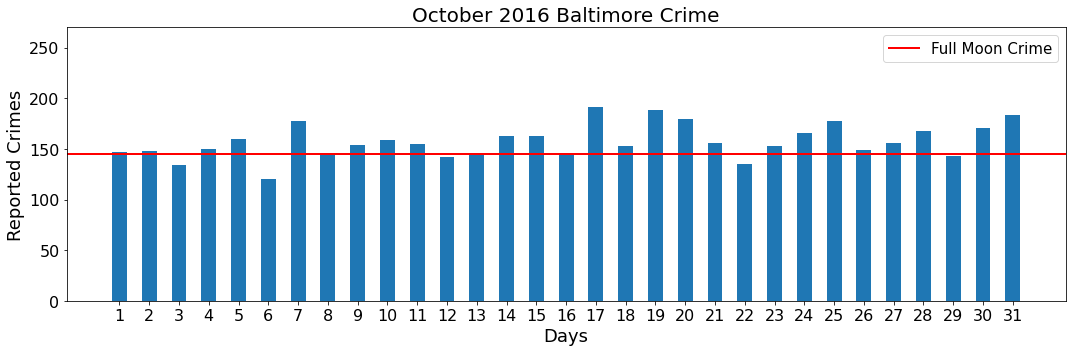

In [22]:
#Baltimore Crime October Plot
#Sort index by date and prepare for x-axis to be labeled by days alone
value_count = baltimore_crime_oct['Crime Date'].value_counts().sort_index()
days_month= list(range(1,32))
x=list(range(1,32))

#Plot parameters
fig = plt.figure(figsize = (15,5))
plt.bar(days_month, value_count, width = .5)

#label plot
plt.xticks(x)
plt.tick_params(labelsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylim(0,270)
plt.ylabel('Reported Crimes', fontsize=18)
plt.title('October 2016 Baltimore Crime', fontsize=20)

#add line for day of full moon
plt.axhline(y=145, color='r', linewidth=2)

#labels = ["Full Moon Crime line"]
#handles, _ = ax.get_legend_handles_labels()

plt.legend(["Full Moon Crime"],prop={'size': 15})
fig.tight_layout()

plt.savefig('baltimore_images/baltimore_2016_oct.png')
plt.show()

In [23]:
#Baltimore Crime November Data
baltimore_crime_nov_unsorted = baltimore_crime_2016[baltimore_crime_2016['Crime Date'].dt.month == 11]
baltimore_crime_nov = baltimore_crime_nov_unsorted.sort_values(by="Crime Date")

#To find value for day with full moon
baltimore_crime_nov_14 = baltimore_crime_nov[baltimore_crime_nov['Crime Date'].dt.day == 14]

day_average = f'{((baltimore_crime_nov_14["Crime Date"].count()/baltimore_crime_nov["Crime Date"].count())*100).round(2)}%'
monthly_average = f'{int(baltimore_crime_nov["Crime Date"].count()/31)}'

df_total_nov = pd.DataFrame(baltimore_crime_nov['Crime Date'].value_counts())
df_total_nov.columns = ['Reported Crime']
df_total_nov['Rank'] = df_total_nov['Reported Crime'].rank(ascending=0)
baltimore_nov_max = df_total_nov['Reported Crime'].max()
baltimore_nov_min = df_total_nov['Reported Crime'].min()


print(f'November in Baltimore:')
print(f'Total number of crimes reported: {baltimore_crime_nov["Crime Date"].count()}')
print(f'Average number of crimes per day for whole month: {monthly_average}')
print(f'The maximum crime committed on one day: {baltimore_nov_max}')
print(f'The minimum crime committed on one day: {baltimore_nov_min}')
print(f'Total crime on full mon (November 14th): {baltimore_crime_nov_14["Crime Date"].count()}')
print(f'Percentage of monthy crime that occured on day of the full moon: {day_average}')
print(f'Rank of crime on full moon: 28/30')
df_total_nov['Reported Crime'].max()

November in Baltimore:
Total number of crimes reported: 4363
Average number of crimes per day for whole month: 140
The maximum crime committed on one day: 181
The minimum crime committed on one day: 111
Total crime on full mon (November 14th): 128
Percentage of monthy crime that occured on day of the full moon: 2.93%
Rank of crime on full moon: 28/30


181

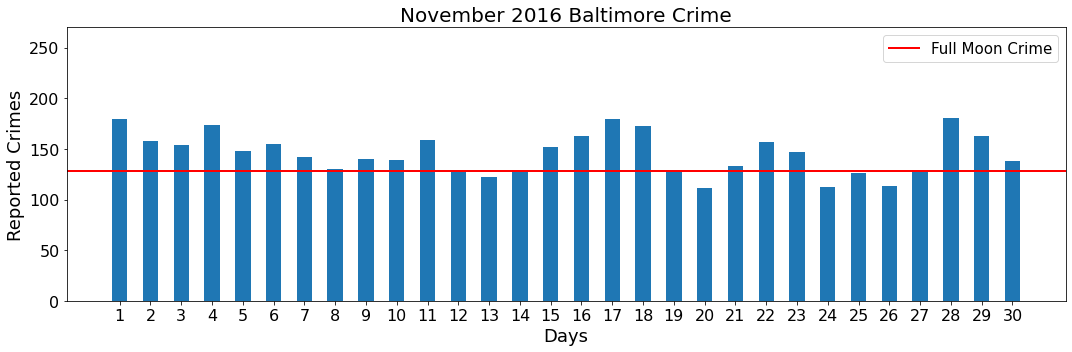

In [24]:
#Baltimore Crime November Plot
#Sort index by date and prepare for x-axis to be labeled by days alone
value_count = baltimore_crime_nov['Crime Date'].value_counts().sort_index()
days_month= list(range(1,31))
x=list(range(1,31))

#Plot parameters
fig = plt.figure(figsize = (15,5))
plt.bar(days_month, value_count, width = .5)

#label plot
plt.xticks(x)
plt.tick_params(labelsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylim(0,270)
plt.ylabel('Reported Crimes', fontsize=18)
plt.title('November 2016 Baltimore Crime', fontsize=20)

#add line for day of full moon
plt.axhline(y=128, color='r', linewidth=2)

#labels = ["Full Moon Crime line"]
#handles, _ = ax.get_legend_handles_labels()

plt.legend(["Full Moon Crime"],prop={'size': 15})
fig.tight_layout()

plt.savefig('baltimore_images/baltimore_2016_nov.png')
plt.show()

In [25]:
#Baltimore Crime December Data
baltimore_crime_dec_unsorted = baltimore_crime_2016[baltimore_crime_2016['Crime Date'].dt.month == 12]
baltimore_crime_dec = baltimore_crime_dec_unsorted.sort_values(by="Crime Date")

#To find value for day with full moon
baltimore_crime_dec_14 = baltimore_crime_dec[baltimore_crime_dec['Crime Date'].dt.day == 14]

day_average = f'{((baltimore_crime_dec_14["Crime Date"].count()/baltimore_crime_dec["Crime Date"].count())*100).round(2)}%'
monthly_average = f'{int(baltimore_crime_dec["Crime Date"].count()/31)}'

df_total_dec = pd.DataFrame(baltimore_crime_dec['Crime Date'].value_counts())
df_total_dec.columns = ['Reported Crime']
df_total_dec['Rank'] = df_total_dec['Reported Crime'].rank(ascending=0)
baltimore_dec_max = df_total_dec['Reported Crime'].max()
baltimore_dec_min = df_total_dec['Reported Crime'].min()


print(f'December in Baltimore:')
print(f'Total number of crimes reported: {baltimore_crime_dec["Crime Date"].count()}')
print(f'Average number of crimes per day for whole month: {monthly_average}')
print(f'The maximum crime committed on one day: {baltimore_dec_max}')
print(f'The minimum crime committed on one day: {baltimore_dec_min}')
print(f'Total crime on full mon (December 14th): {baltimore_crime_dec_14["Crime Date"].count()}')
print(f'Percentage of monthy crime that occured on day of the full moon: {day_average}')
print(f'Rank of crime on full moon: 28/31')
df_total_dec['Reported Crime'].max()

December in Baltimore:
Total number of crimes reported: 4143
Average number of crimes per day for whole month: 133
The maximum crime committed on one day: 179
The minimum crime committed on one day: 88
Total crime on full mon (December 14th): 124
Percentage of monthy crime that occured on day of the full moon: 2.99%
Rank of crime on full moon: 28/31


179

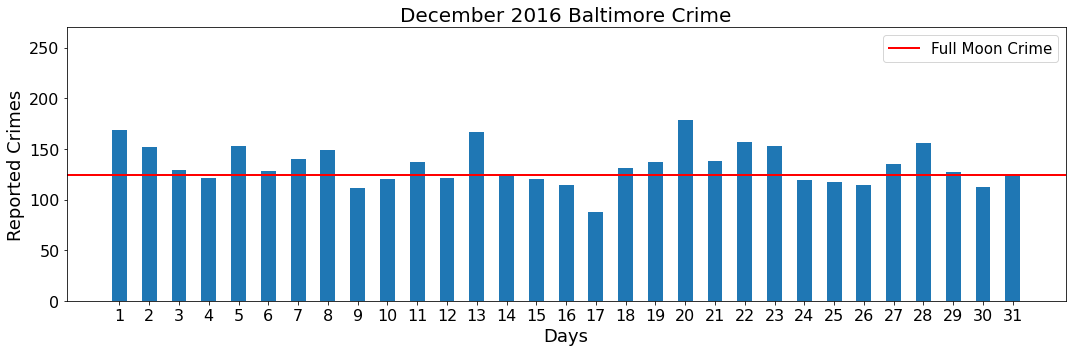

In [26]:
#Baltimore Crime December Plot
#Sort index by date and prepare for x-axis to be labeled by days alone
value_count = baltimore_crime_dec['Crime Date'].value_counts().sort_index()
days_month= list(range(1,32))
x=list(range(1,32))

#Plot parameters
fig = plt.figure(figsize = (15,5))
plt.bar(days_month, value_count, width = .5)

#label plot
plt.xticks(x)
plt.tick_params(labelsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylim(0,270)
plt.ylabel('Reported Crimes', fontsize=18)
plt.title('December 2016 Baltimore Crime', fontsize=20)

#add line for day of full moon
plt.axhline(y=124, color='r', linewidth=2)

#labels = ["Full Moon Crime line"]
#handles, _ = ax.get_legend_handles_labels()

plt.legend(["Full Moon Crime"],prop={'size': 15})
fig.tight_layout()

plt.savefig('baltimore_images/baltimore_2016_dec.png')
plt.show()

In [27]:
#Baltimore crime over the year
full_moon_jan =int(baltimore_crime_jan_24["Crime Date"].count())
full_moon_feb =int(baltimore_crime_feb_22["Crime Date"].count())
full_moon_mar =int(baltimore_crime_mar_23["Crime Date"].count())
full_moon_apr =int(baltimore_crime_apr_22["Crime Date"].count())
full_moon_may =int(baltimore_crime_may_21["Crime Date"].count())
full_moon_june =int(baltimore_crime_june_20["Crime Date"].count())
full_moon_july =int(baltimore_crime_july_20["Crime Date"].count())
full_moon_aug =int(baltimore_crime_aug_18["Crime Date"].count())
full_moon_sept =int(baltimore_crime_sept_16["Crime Date"].count())
full_moon_oct =int(baltimore_crime_oct_16["Crime Date"].count())
full_moon_nov =int(baltimore_crime_nov_14["Crime Date"].count())
full_moon_dec =int(baltimore_crime_dec_14["Crime Date"].count())
baltimore_year_crime = pd.DataFrame([['Jan', full_moon_jan, baltimore_jan_max, baltimore_jan_min],
                                  ['Feb', full_moon_feb, baltimore_feb_max, baltimore_feb_min],
                                  ['Mar', full_moon_mar, baltimore_mar_max, baltimore_mar_min],
                                  ['Apr', full_moon_apr, baltimore_apr_max, baltimore_apr_min],
                                  ['May', full_moon_may, baltimore_may_max, baltimore_may_min],
                                  ['June', full_moon_june, baltimore_june_max, baltimore_june_min],
                                  ['July', full_moon_july, baltimore_july_max, baltimore_july_min],
                                  ['Aug', full_moon_aug, baltimore_aug_max, baltimore_aug_min],
                                  ['Sept', full_moon_sept, baltimore_sept_max, baltimore_sept_min],
                                  ['Oct', full_moon_oct, baltimore_oct_max, baltimore_oct_min],
                                  ['Nov', full_moon_nov, baltimore_nov_max, baltimore_nov_min],
                                  ['Dec', full_moon_dec, baltimore_dec_max, baltimore_dec_min]],
                                columns=["Month", "Full Moon", "Max", "Min"])
baltimore_year_crime

,Month,Full Moon,Max,Min
0,Jan,46,161,33
1,Feb,115,124,63
2,Mar,139,149,86
3,Apr,147,157,97
4,May,130,166,104
5,June,186,255,113
6,July,162,163,107
7,Aug,143,159,105
8,Sept,151,194,127
9,Oct,145,191,120


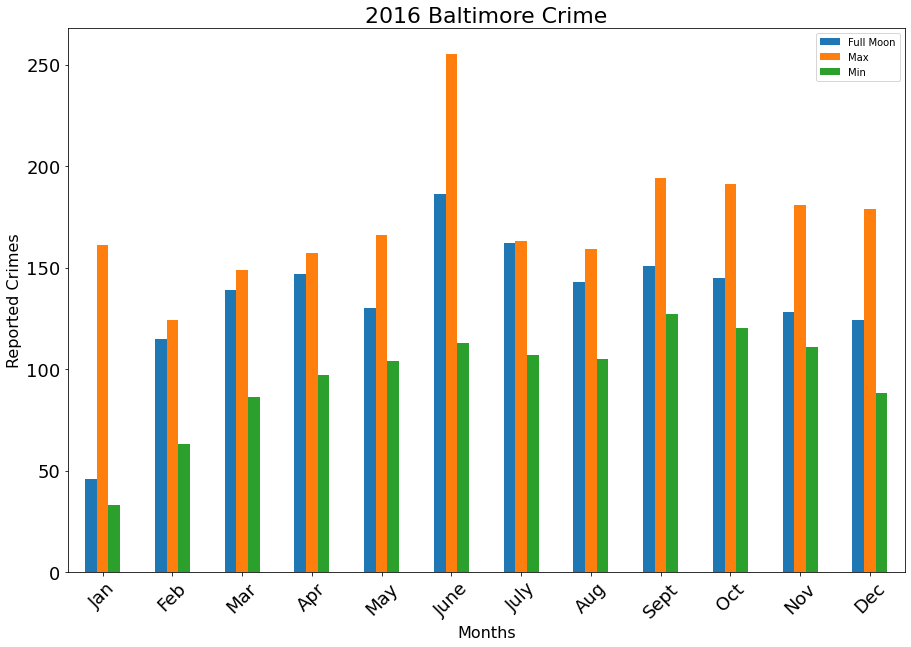

In [28]:
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec' ]
y = (range(0, 12))
ax = baltimore_year_crime[['Full Moon','Max', 'Min']].plot(kind='bar', figsize=(15, 10), legend=True, fontsize=18, rot=45)
ax.set_xticks(y)
ax.set_xticklabels(labels)
plt.xlabel('Months', fontsize=16)
plt.ylabel('Reported Crimes', fontsize=16)
plt.title('2016 Baltimore Crime', fontsize=22)

plt.savefig('baltimore_images/baltimore_2016_compare.png')
plt.show()

In [29]:
baltimore_total_crime_2016 = int(baltimore_crime_2016['Crime Date'].count())
baltimore_full_moon_total_crime = (full_moon_jan + full_moon_feb + full_moon_mar + full_moon_apr +
                                full_moon_may + full_moon_june + full_moon_july + full_moon_aug +
                                full_moon_sept + full_moon_oct + full_moon_nov + full_moon_dec)
print(baltimore_total_crime_2016)
print(baltimore_full_moon_total_crime)

48749
1616


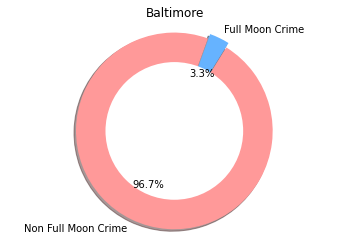

12 of 366 days is 3.28 percent of the yearly value
This shows that the full moon days combined is the same as the average day for the year


In [30]:
# plot each pie chart in a separate subplot
sizes = [(baltimore_total_crime_2016-baltimore_full_moon_total_crime), baltimore_full_moon_total_crime]
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Non Full Moon Crime', 'Full Moon Crime'
colors = ['#FF9999', '#66B3FF']
explode = (0, 0.05)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=70, colors=colors)
ax1.axis('equal')  
# Equal aspect ratio ensures that pie is drawn as a circle.
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Baltimore')

plt.savefig('baltimore_images/baltimore_total_crime.png')
plt.show()

print(f'12 of 366 days is 3.28 percent of the yearly value')
print(f'This shows that the full moon days combined is the same as the average day for the year')